In [36]:
from skopt.benchmarks import hart6
"""The six dimensional Hartmann function defined on the unit hypercube.

It has six local minima and one global minimum f(x*) = -3.32237 at
x* = (0.20169, 0.15001, 0.476874, 0.275332, 0.311652, 0.6573).

More details: <http://www.sfu.ca/~ssurjano/hart6.html>
"""
from sklearn.metrics.scorer import mean_absolute_error as error_func
import skopt
import hyperopt
import numpy as np


In [37]:
def log(l, *a, **k):
    print(*a, **k)

In [50]:
true_x = [0.20169, 0.15001, 0.476874, 0.275332, 0.311652, 0.6573]
true_y = -3.32237
class Target:
    def __init__(self, error_level=1):
        self.error_level = error_level
        self.records = []
        self.space = [(-1.0, 1.0)] * 6
        self.x = None
        self.min = None
        
    def target(self, x, error_level=None):
        if error_level is None:
            error_level = self.error_level
        log(4, 'loop', len(self.records))
        log(4, 'new_x', x)
        log(4, 'error of x', error_func(true_x, x))
        res_true = hart6(x)
        res = res_true + np.random.randn() * error_level
        log(4, 'output score', res)
        log(4, 'true score', res_true)
        self.records.append({
            'idx': len(self.records),
            'x': x, 
            'x_error': error_func(true_x, x),
            'y_true': res_true,
            'y_output': res
        })
        return res
    
    def final_score(self):
        return self.target(self.x, 0)

In [52]:
methods = {
    'BaysionOptimize': skopt.gp_minimize, 
#     'RandomSearch': , 
#     'TreeP'
}
results = {}
for method in methods:
    t = Target(error_level=0)
    results[method] = t
    print(methods[method])
    res = methods[method](t.target, t.space, n_calls=10)
    t.x = res.x

<function gp_minimize at 0x7f26cf922158>
loop 0
new_x [0.84605643117848373, -0.32407638152371243, -0.24197790837141064, 0.74955637172404321, 0.25086310936434231, -0.18220442969760975]
error of x 0.535303735522
output score -9.07062544183e-05
true score -9.07062544183e-05
loop 1
new_x [0.070363859055465383, -0.13421948812648576, 0.95297890713416389, -0.96517906561213285, -0.6205593087099559, -0.19450372646716985]
error of x 0.652697772832
output score -3.73512911944e-07
true score -3.73512911944e-07
loop 2
new_x [-0.61824771039992599, 0.99942802897875649, -0.66557109752875387, 0.35797032127614625, -0.15154410275604779, 0.23351808358197146]
error of x 0.630236196226
output score -2.82048828092e-05
true score -2.82048828092e-05
loop 3
new_x [0.96947123919467115, -0.18714005064360695, -0.79929004889262578, -0.99612534254721918, -0.31791876759361637, 0.24177143981925298]
error of x 0.782942001509
output score -9.50674475498e-13
true score -9.50674475498e-13
loop 4
new_x [0.84654892034348106

In [55]:
print(results['BaysionOptimize'].x)
print(results['BaysionOptimize'].final_score())

[0.0022307105439005603, -0.013766690040008411, -0.55012136919607912, 0.59467962144528208, 0.26570270146525021, 0.50920071511226306]
loop 10
new_x [0.0022307105439005603, -0.013766690040008411, -0.55012136919607912, 0.59467962144528208, 0.26570270146525021, 0.50920071511226306]
error of x 0.317271258927
output score -0.183644301524
true score -0.183644301524
-0.183644301524


In [6]:
print(res_gp)

          fun: -0.00508911288366444
    func_vals: array([ -1.04998615e-20,  -4.48885563e-23,  -1.03383695e-12,
        -5.08911288e-03,  -5.00088708e-10,  -4.19803489e-04,
        -1.73499448e-09,  -7.79591760e-09,  -5.91048228e-07,
        -5.28017268e-05,  -9.16522853e-25,  -7.28597279e-16,
        -1.98943915e-09,  -1.06229510e-16,  -7.59583658e-12,
        -5.47614778e-26,  -1.22090650e-10,  -2.93033958e-10,
        -2.09963180e-19,  -7.42628325e-11,  -1.26903873e-22,
        -2.61172375e-22,  -2.10216506e-09,  -2.59762573e-20,
        -1.12638695e-06,  -9.55568301e-17,  -1.13135197e-18,
        -1.37274458e-06,  -1.38753071e-17,  -5.60224601e-30,
        -1.63009844e-10,  -2.48603429e-20,  -7.28597279e-16,
        -1.13135197e-18,  -1.13400242e-13,  -1.37274458e-06,
        -1.75305071e-17,  -5.60224601e-30,  -2.48603429e-20,
        -3.32109041e-09,  -5.58398883e-19,  -7.59583658e-12,
        -7.67594931e-20,  -9.55568301e-17,  -9.35498529e-20,
        -2.82096689e-32,  -4.96712

In [7]:
hart6(res_gp.x)

-0.00508911288366444

In [9]:
from matplotlib import pylab as plt
from skopt.plots import plot_convergence
plot_convergence(res_gp)

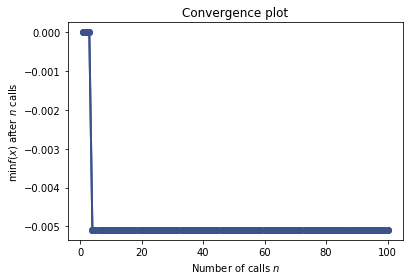

In [10]:
plt.show()